In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
estonia = pd.read_csv('estonia-passenger-list.csv')

In [3]:
estonia.head()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0


In [4]:
estonia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  989 non-null    int64 
 1   Country      989 non-null    object
 2   Firstname    989 non-null    object
 3   Lastname     989 non-null    object
 4   Sex          989 non-null    object
 5   Age          989 non-null    int64 
 6   Category     989 non-null    object
 7   Survived     989 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 61.9+ KB


In [5]:
estonia.isnull().sum()

PassengerId    0
Country        0
Firstname      0
Lastname       0
Sex            0
Age            0
Category       0
Survived       0
dtype: int64

In [6]:
estonia['Country'].unique()

array(['Sweden', 'Estonia', 'Latvia', 'Russia', 'Germany', 'Finland',
       'Great Britain', 'Morocco', 'Denmark', 'France', 'Netherlands',
       'Norway', 'Lithuania', 'Nigeria', 'Canada', 'Belarus'],
      dtype=object)

In [7]:
top10_country= estonia['Country'].value_counts().head(10).index

In [8]:
top10_country=list(top10_country)

In [9]:
top10_country

['Sweden',
 'Estonia',
 'Latvia',
 'Finland',
 'Russia',
 'Norway',
 'Germany',
 'Denmark',
 'Lithuania',
 'Netherlands']

In [10]:
for features in top10_country:
    estonia[features]=np.where(estonia['Country']==features,1,0)
    

In [11]:
estonia.head()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived,Sweden,Estonia,Latvia,Finland,Russia,Norway,Germany,Denmark,Lithuania,Netherlands
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0,1,0,0,0,0,0,0,0,0,0
1,2,Estonia,LEA,AALISTE,F,22,C,0,0,1,0,0,0,0,0,0,0,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0,0,1,0,0,0,0,0,0,0,0
3,4,Sweden,JURI,AAVIK,M,53,C,0,1,0,0,0,0,0,0,0,0,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0,1,0,0,0,0,0,0,0,0,0


In [12]:
estonia.drop('Country',axis=1,inplace=True)

In [13]:
estonia.head()

,PassengerId,Firstname,Lastname,Sex,Age,Category,Survived,Sweden,Estonia,Latvia,Finland,Russia,Norway,Germany,Denmark,Lithuania,Netherlands
0,1,ARVID KALLE,AADLI,M,62,P,0,1,0,0,0,0,0,0,0,0,0
1,2,LEA,AALISTE,F,22,C,0,0,1,0,0,0,0,0,0,0,0
2,3,AIRI,AAVASTE,F,21,C,0,0,1,0,0,0,0,0,0,0,0
3,4,JURI,AAVIK,M,53,C,0,1,0,0,0,0,0,0,0,0,0
4,5,BRITTA ELISABET,AHLSTROM,F,55,P,0,1,0,0,0,0,0,0,0,0,0


In [14]:
estonia['Category'].unique()

array(['P', 'C'], dtype=object)

In [15]:
catergory = pd.get_dummies(estonia['Category'],drop_first=True)
estonia = pd.concat([estonia,catergory],axis=1)

In [16]:
estonia.head()

,PassengerId,Firstname,Lastname,Sex,Age,Category,Survived,Sweden,Estonia,Latvia,Finland,Russia,Norway,Germany,Denmark,Lithuania,Netherlands,P
0,1,ARVID KALLE,AADLI,M,62,P,0,1,0,0,0,0,0,0,0,0,0,1
1,2,LEA,AALISTE,F,22,C,0,0,1,0,0,0,0,0,0,0,0,0
2,3,AIRI,AAVASTE,F,21,C,0,0,1,0,0,0,0,0,0,0,0,0
3,4,JURI,AAVIK,M,53,C,0,1,0,0,0,0,0,0,0,0,0,0
4,5,BRITTA ELISABET,AHLSTROM,F,55,P,0,1,0,0,0,0,0,0,0,0,0,1


In [17]:
sex = pd.get_dummies(estonia['Sex'],drop_first=True)
estonia = pd.concat([estonia,sex],axis=1)

In [18]:
estonia.head()

,PassengerId,Firstname,Lastname,Sex,Age,Category,Survived,Sweden,Estonia,Latvia,Finland,Russia,Norway,Germany,Denmark,Lithuania,Netherlands,P,M
0,1,ARVID KALLE,AADLI,M,62,P,0,1,0,0,0,0,0,0,0,0,0,1,1
1,2,LEA,AALISTE,F,22,C,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,AIRI,AAVASTE,F,21,C,0,0,1,0,0,0,0,0,0,0,0,0,0
3,4,JURI,AAVIK,M,53,C,0,1,0,0,0,0,0,0,0,0,0,0,1
4,5,BRITTA ELISABET,AHLSTROM,F,55,P,0,1,0,0,0,0,0,0,0,0,0,1,0


In [19]:
estonia.drop(['Sex','Category'],axis=1,inplace=True)

In [20]:
estonia.head()

,PassengerId,Firstname,Lastname,Age,Survived,Sweden,Estonia,Latvia,Finland,Russia,Norway,Germany,Denmark,Lithuania,Netherlands,P,M
0,1,ARVID KALLE,AADLI,62,0,1,0,0,0,0,0,0,0,0,0,1,1
1,2,LEA,AALISTE,22,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,AIRI,AAVASTE,21,0,0,1,0,0,0,0,0,0,0,0,0,0
3,4,JURI,AAVIK,53,0,1,0,0,0,0,0,0,0,0,0,0,1
4,5,BRITTA ELISABET,AHLSTROM,55,0,1,0,0,0,0,0,0,0,0,0,1,0


In [21]:
estonia.drop(['Firstname','Lastname'],axis=1,inplace=True)

In [22]:
estonia.head()

,PassengerId,Age,Survived,Sweden,Estonia,Latvia,Finland,Russia,Norway,Germany,Denmark,Lithuania,Netherlands,P,M
0,1,62,0,1,0,0,0,0,0,0,0,0,0,1,1
1,2,22,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,21,0,0,1,0,0,0,0,0,0,0,0,0,0
3,4,53,0,1,0,0,0,0,0,0,0,0,0,0,1
4,5,55,0,1,0,0,0,0,0,0,0,0,0,1,0


In [23]:
estonia.drop('PassengerId',axis=1,inplace=True)

In [24]:
estonia.head()

,Age,Survived,Sweden,Estonia,Latvia,Finland,Russia,Norway,Germany,Denmark,Lithuania,Netherlands,P,M
0,62,0,1,0,0,0,0,0,0,0,0,0,1,1
1,22,0,0,1,0,0,0,0,0,0,0,0,0,0
2,21,0,0,1,0,0,0,0,0,0,0,0,0,0
3,53,0,1,0,0,0,0,0,0,0,0,0,0,1
4,55,0,1,0,0,0,0,0,0,0,0,0,1,0


In [25]:
estonia['Survived'].value_counts()

0    852
1    137
Name: Survived, dtype: int64

In [26]:
X = estonia.drop('Survived',axis=1)
y = estonia['Survived']

In [27]:
y.shape

(989,)

In [29]:
from imblearn.combine import SMOTETomek

In [30]:
smk =SMOTETomek(random_state=42)

In [31]:
X_res,y_res =smk.fit_sample(X,y)

In [32]:
y_res.shape

(1704,)

In [33]:
X_res.shape

(1704, 13)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.33, random_state=42)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lr = LogisticRegression()

In [38]:
lr.fit(X_train,y_train)

C:\Users\Lohith Puneeth Varma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
y_pred = lr.predict(X_test)

In [40]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       276
           1       0.75      0.78      0.77       287

    accuracy                           0.76       563
   macro avg       0.76      0.76      0.76       563
weighted avg       0.76      0.76      0.76       563



In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
error_rate =[]
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_knn = knn.predict(X_test)
    error_rate.append(np.mean(pred_knn!=y_test))

Text(0, 0.5, 'Error Rate')

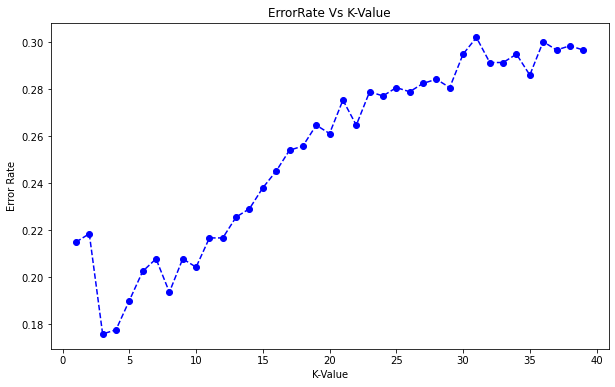

In [45]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o')
plt.title('ErrorRate Vs K-Value')
plt.xlabel('K-Value')
plt.ylabel('Error Rate')

In [46]:
knn = KNeighborsClassifier(n_neighbors=4)

In [47]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [48]:
y_pred_knn = knn.predict(X_test)

In [49]:
from sklearn.metrics import classification_report

In [50]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       276
           1       0.80      0.86      0.83       287

    accuracy                           0.82       563
   macro avg       0.82      0.82      0.82       563
weighted avg       0.82      0.82      0.82       563



In [51]:
from sklearn.ensemble import RandomForestClassifier
rf_random = RandomForestClassifier()
rf_random.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
n_estimators =[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features=['auto','sqrt']
max_depth= [int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [53]:
from sklearn.model_selection import RandomizedSearchCV

In [54]:
random_grid={'n_estimators':n_estimators,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,'max_features':max_features}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10], 'max_features': ['auto', 'sqrt']}


In [55]:
rf = RandomForestClassifier()

In [56]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,
                             scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [57]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.3s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   44.8s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [58]:
y_pred_rf = rf_random.predict(X_test)

In [59]:
from sklearn.metrics import classification_report

In [60]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       276
           1       0.79      0.86      0.83       287

    accuracy                           0.82       563
   macro avg       0.82      0.82      0.82       563
weighted avg       0.82      0.82      0.82       563

